<div style=" text-align: center; justify-content: center; align-items: center; background-color:#272727; padding: 10px;  border-radius: 10px;">
    <h1 style="color: white;  margin-top: 9px; margin-bottom: 9px; "><center>
        Titanic 🛳️ | EDA  + Predictions 📈
</center></h1>
</div>

<center>
        <img src="https://t3.ftcdn.net/jpg/05/79/15/62/360_F_579156262_spzSiXdm3G8535tU6qRqMzvFLy9WwaZz.jpg" width=500>
</center>

# Introduction 📖

The Titanic dataset, a historical dataset derived from the tragic sinking of the RMS Titanic in 1912, has become a quintessential benchmark in the field of data analysis and machine learning. This dataset provides a glimpse into the diverse demographics of the passengers aboard the Titanic, including information such as age, gender, class, and fare. The dataset also records whether each passenger survived the disaster or not.

In this analysis, the goal is to predict passenger survival on the Titanic by employing data exploration and advanced techniques. The focus is on building a model that anticipates whether a passenger survived the disaster. Through the examination of individual traits, patterns will be uncovered, illuminating the crucial factors influencing survival.

----------------------------
# Table of Contents 📑

> - [1 - Import Libraries 📚](#1)
> - [2 - Data Exploration 🔎](#2)
> - [3 - Exploratory Data Analysis 📊](#3)
>    - [3.1- Univariate Analysis](#3.1)
>    - [3.2- Bivariate Analysis](#3.2)
> - [4 - Data Preprocessing ⚒️](#4)
>    - [4.1- Feature Extraction](#4.1)
>    - [4.2- Handling Missing Data](#4.2)
>    - [4.3- Handling Categorical Data](#4.3)
>    - [4.4- Data Split to Train and Test Sets](#4.4)
>    - [4.5- Handling Imbalanced Data](#4.5)
>    - [4.6- Feature Scaling](#4.6)
> - [5- Models Training and Evaluation ⚙️](#5)
>    - [5.1- K-fold Cross-Validation Evaluation and Feature Selection](#5.1)
> - [6- Hyperparameter Tuning 🛠️](#6)
>    - [6.1- ROC Curve for Final Model (LGBMClassifier)](#6.1)
> - [7- Submission💡](#7)

---------------------------------------
<a class="anchor"  id="1"></a>
# 1- Import Libraries 📚

In [1]:
# EDA Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Data Preprocessing Libraries
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import SMOTE

# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score 
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

-------------------
<a class="anchor"  id="2"></a>
# 2- Data Exploration 🔎

In [2]:
# Reading Train csv file
df_train = pd.read_csv('train.csv')
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S


In [3]:
# check the dataset shape
print("Number of Columns in Train data",df_train.shape[1])
print("---------------------------------------")
print("Number of Rows in Train data",df_train.shape[0])

Number of Columns in Train data 12
---------------------------------------
Number of Rows in Train data 891


In [4]:
# Reading Test csv file
df_test = pd.read_csv('test.csv')
df_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S
157,1049,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S
151,1043,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C
301,1193,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C
169,1061,3,"Hellstrom, Miss. Hilda Maria",female,22.0,0,0,7548,8.9625,NaN,S
389,1281,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S
52,944,2,"Hocking, Miss. Ellen Nellie""""",female,20.0,2,1,29105,23.0000,NaN,S
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C


In [5]:
# check the dataset shape
print("Number of Columns in Train data",df_test.shape[1])
print("---------------------------------------")
print("Number of Rows in Train data",df_test.shape[0])

Number of Columns in Train data 11
---------------------------------------
Number of Rows in Train data 418


### Feature Exploration

> - **`survival`**:	Survival (0 = No, 1 = Yes)
> - **`pclass`**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
> - **`sex`**: Sex	
> - **`Age`**: Age in years	
> - **`sibsp`**: Number of siblings / spouses aboard the Titanic	
> - **`parch`**: Number of parents / children aboard the Titanic	
> - **`ticket`**: Ticket number	
> - **`fare`**:	Passenger fare	
> - **`cabin`**: Cabin number	
> - **`embarked`**:	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

## Working On Train.CSV File

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Need to drop PassengerId and Ticket columns as they are unique identifier and not useful for predictions.
- Age, Cabin and Embarked columns has missing values and needs to be handled   

In [7]:
# Dropping PassengerId and Ticket columns as they are unique identifier and not useful for predictions.
df_train = df_train.drop(['PassengerId', 'Ticket'], axis=1)

df_test = df_test.drop('Ticket', axis=1)

In [8]:
# checking count the number of unique values in each column of the data
df_train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [9]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [10]:
# Descriptive analysis for categorical data
df_train.describe(include='O')

,Name,Sex,Cabin,Embarked
count,891,891,204,889
unique,891,2,147,3
top,"Braund, Mr. Owen Harris",male,B96 B98,S
freq,1,577,4,644


In [11]:
# Descriptive analysis for numerical data
df_train.describe().style.background_gradient()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> I noticed the lowest age recorded is 0.42, likely indicating a baby's age in years. Which looks fine, so we can use it in our analysis and modeling.

-----------------------------------------
<a class="anchor"  id="3"></a>
# 3- Exploratory Data Analysis 📊

<a class="anchor"  id="3.1"></a>
## 3.1- Univariate Analysis

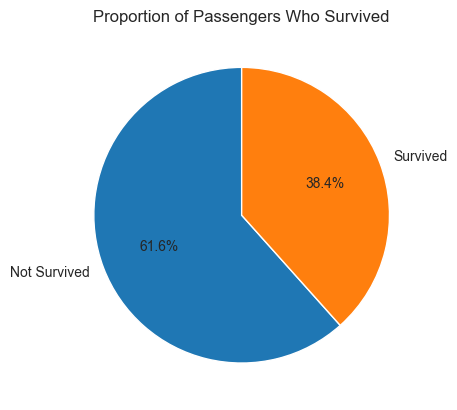

In [12]:
survived_counts = df_train['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Passengers Who Survived')
plt.show()

**Insight**
- A higher percentage of passengers (61.6%) did not survive, whereas a relatively smaller percentage (38.4%) survived the incident.

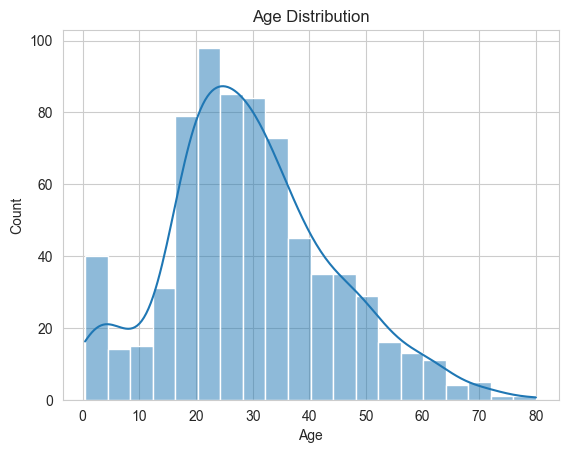

In [14]:
sns.histplot(data=df_train, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Insight**
- The age distribution appears to be right-skewed, indicating that there are relatively more younger passengers in the dataset. However, there are no apparent outliers in the age data.

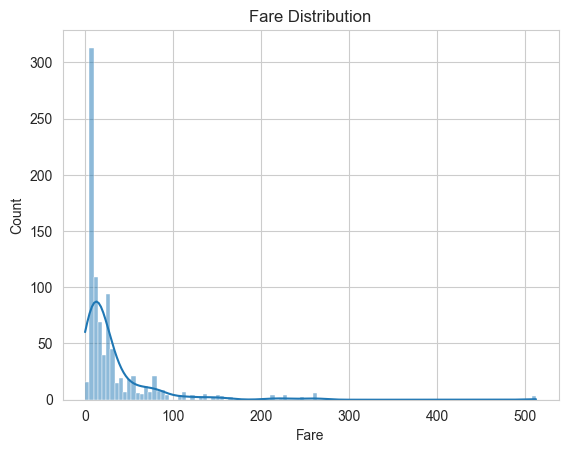

In [15]:
sns.histplot(data=df_train, x='Fare', kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

**Insight**
- The fare distribution exhibits a significant right skewness, primarily because of the presence of outliers in the data.

---------------------------------------------
<a class="anchor"  id="3.2"></a>
## 3.2- Bivariate Analysis

### Analyzing the Impact of Sex on Survival

In [16]:
fig = px.histogram(df_train, x='Sex', color='Survived', barmode='group', title='Survival by Sex', text_auto=True,
                  color_discrete_sequence=['#ff7f0e', '#3498db'],)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [17]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women) * 100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [18]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men) * 100

print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


**Insight**
- More women, about 74%, survived compared to men, with only around 19% of men surviving. This shows that there were big differences in who survived based on gender.

### Analyzing the Impact of Pclass on Survival

In [19]:
fig = px.histogram(df_train, x='Pclass', color='Survived', barmode='group', title='Survival by Pclass', text_auto=True,
                  color_discrete_sequence=['#ff7f0e', '#3498db'],)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

**Insight**
- The data indicates that first-class passengers had the highest survival probability, second-class passengers had roughly equal chances of survival and non-survival, while third-class passengers had the lowest probability of surviving. 

### Analyzing the Impact of Age on Survival

In [20]:
fig = px.histogram(df_train, x='Age', color='Survived', title='Survival by Age',
                   marginal='box', barmode='group', color_discrete_sequence=['#ff7f0e', '#3498db'],
                   )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

**Insight**
- Age has a small effect on survival. As people get older, they are a little less likely to survive. However, age is not the most important factor, and there are other things that matter more for survival.

### Analyzing the Impact of SibSp on Survival

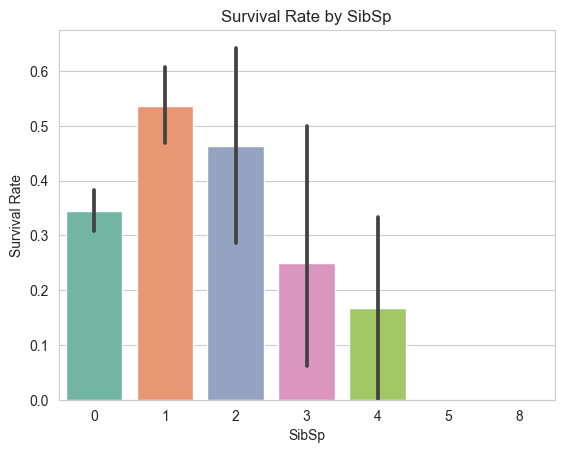

In [21]:
sns.barplot(data=df_train, x='SibSp', y='Survived', palette='Set2')
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Rate')
plt.show()

**Insight**
- Passengers with larger numbers of siblings/spouses have lower survival rates, while those with no or few siblings/spouses (1 or 2) have higher chances of surviving.

### Analyzing the Impact of Parch on Survival

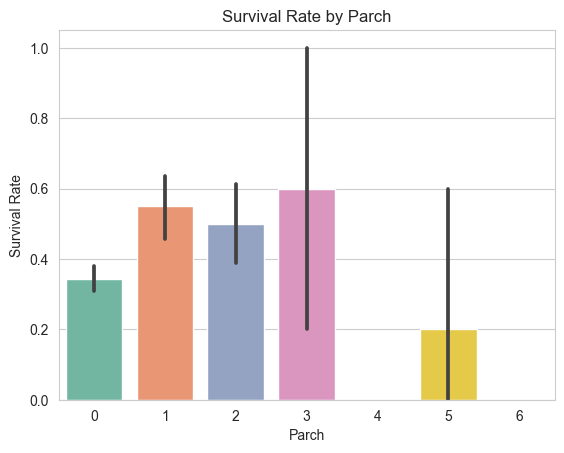

In [22]:
sns.barplot(data=df_train, x='Parch', y='Survived', palette='Set2')
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Rate')
plt.show()

**Insight**
- Passengers with larger numbers of Parents/Children have lower survival rates, while those with no or few Parents/Children (1 or 2) have higher chances of surviving.

### Analyzing the Impact of Fare Cost on Survival

In [23]:
fig = px.box(df_train, x='Survived', y='Fare', color='Survived', 
              title='Fare Distribution by Survival', 
              labels={"Fare": "Passenger Fare", "Survived": "Survived"},
              color_discrete_sequence=['#ff7f0e', '#3498db'])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

**Insight**
- Based on the Boxplot, it seems that when the fare cost goes up, there is only a small increase in the chance of surviving.

### Analyzing the Impact of Embarkation Point on Survival

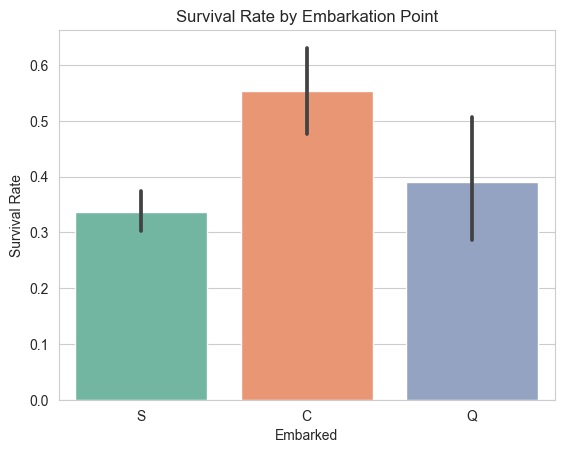

In [24]:
sns.barplot(data=df_train, x='Embarked', y='Survived', palette='Set2')
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

**Insight**
- People who boarded the Titanic in Cherbourg, France, had the highest chance of surviving. Those who boarded from Southampton, England, and Queenstown (Cobh), Ireland, had lower chances of survival.

------------------
<a class="anchor"  id="4"></a>
# 4- Data Preprocessing ⚒️

<a class="anchor"  id="4.1"></a>
## 4.1- Feature Extraction

Creating a **``Title Names``** column provides a more detailed categorization of individuals

In [25]:
df_train['title_name'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

df_test['title_name'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [26]:
df_train['title_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [27]:
df_test['title_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [28]:
def categorize_titles(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    else:
        return 'Other'

# Applying the function to df_train title_name column
df_train['title_name'] = df_train['title_name'].apply(categorize_titles)

df_test['title_name'] = df_test['title_name'].apply(categorize_titles)

In [29]:
# Removing the 'Name' column as full names aren't needed for building the model
df_train = df_train.drop('Name', axis=1)

df_test = df_test.drop('Name', axis=1)

Creating a **``Family Size``** column by adding the 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) columns provides a comprehensive measure of the family size for each passenger.

In [30]:
df_train['family_size'] = df_train['SibSp'] + df_train['Parch']

df_test['family_size'] = df_test['SibSp'] + df_test['Parch']

In [31]:
df_train['family_size'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [32]:
df_test['family_size'].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  6, 10], dtype=int64)

In [33]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title_name,family_size
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,0


In [34]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title_name,family_size
0,892,3,male,34.5,0,0,7.8292,NaN,Q,Mr,0
1,893,3,female,47.0,1,0,7.0000,NaN,S,Mrs,1
2,894,2,male,62.0,0,0,9.6875,NaN,Q,Mr,0
3,895,3,male,27.0,0,0,8.6625,NaN,S,Mr,0
4,896,3,female,22.0,1,1,12.2875,NaN,S,Mrs,2


## EDA Continuation

### Analyzing the Impact of Title Name on Survival

In [35]:
fig = px.histogram(df_train, x='title_name', color='Survived', barmode='group', title='Survival by Title', text_auto=True,
                  color_discrete_sequence=['#ff7f0e', '#3498db'],)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

**Insight**
- Men with the title "Mr." had the most non-survivors. Women with titles "Miss" and "Mrs." survived the most and had the fewest non-survivors. This shows that women were the top priority for survival during the incident.

### Analyzing the Impact of Family Size on Survival

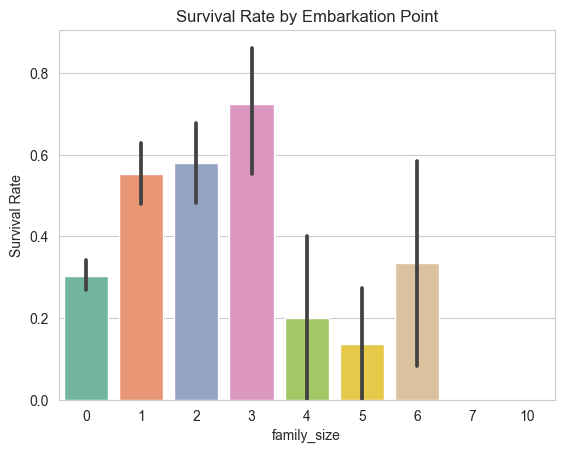

In [36]:
sns.barplot(data=df_train, x='family_size', y='Survived', palette='Set2')
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

**Insight**
- Families with three or fewer members had a better chance of surviving. But families with four or more members had a lower chance of surviving. This shows that smaller families were safer during the incident.

<a class="anchor"  id="4.2"></a>
## 4.2- Handling Missing Data

### For train.csv

In [37]:
# checking for missing values in data
df_train.isna().sum() / df_train.shape[0]*100

Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
title_name      0.000000
family_size     0.000000
dtype: float64

> - Age has 20% missing data, which needs to be handled.
> - Cabin has 77% missing data, a significant amount, and needs to be dropped
> - Embarked has 0.22% missing data, which needs to be handled.

In [38]:
# Sort the DataFrame based on the 'title_name' column
df_train.sort_values(by='title_name', inplace=True)

# Extract the 'Age' column as a 2D array for imputation
age_data = df_train['Age'].values.reshape(-1, 1)

# Initialize KNN imputer with k=5 (number of nearest neighbors)
imputer = KNNImputer(n_neighbors=5)

# Perform imputation on the 'Age' column
df_train['Age'] = imputer.fit_transform(age_data)

> Sorting the titles helps us make better guesses about missing ages. When titles are sorted, people with similar titles are put together. Usually, people with the same title are of similar ages. So, when we fill in missing ages using the nearest neighbors (KNN imputer), we're using ages of people with the same or similar titles. This way, our guesses about missing ages become more accurate and realistic.

In [39]:
# Dropping the 'Cabin' column due to its significant missing values of 77%.
df_train = df_train.drop('Cabin', axis=1)

In [40]:
# Initialize the SimpleImputer with most frequent strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Reshape the column for imputation (required for 1D arrays)
imputed_column = imputer.fit_transform(df_train['Embarked'].values.reshape(-1, 1))

# Replace the original column with the imputed values
df_train['Embarked'] = imputed_column

> We will fill in the missing data of Embarked column using the SimpleImputer tool, which calculates the most frequent (mode) value and uses it to replace the missing values.

In [41]:
df_train.isna().sum() / df_train.shape[0]*100

Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
title_name     0.0
family_size    0.0
dtype: float64

> Now data is cleaned for train.csv file

### For test.csv

In [42]:
df_test.isna().sum() / df_test.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
title_name      0.000000
family_size     0.000000
dtype: float64

> - Age has 20% missing data, which needs to be handled.
> - Cabin has 78% missing data, a significant amount, and needs to be dropped
> - Fare has 0.23% missing data, which needs to be handled.

In [43]:
# Sort the DataFrame based on the 'title_name' column
df_test.sort_values(by='title_name', inplace=True)

# Extract the 'Age' column as a 2D array for imputation
age_data = df_test['Age'].values.reshape(-1, 1)

# Initialize KNN imputer with k=5 (number of nearest neighbors)
imputer = KNNImputer(n_neighbors=5)

# Perform imputation on the 'Age' column
df_test['Age'] = imputer.fit_transform(age_data)

> Handling the age information in 'test.csv' the same way as we did in 'train.csv

In [44]:
# Dropping the 'Cabin' column due to its significant missing values of 78%.
df_test = df_test.drop('Cabin', axis=1)

In [45]:
# Initialize the SimpleImputer with mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Reshape the column for imputation (required for 1D arrays)
imputed_column = imputer.fit_transform(df_test['Fare'].values.reshape(-1, 1))

# Replace the original column with the imputed values
df_test['Fare'] = imputed_column

> We will fill in the missing data of Fare column using the SimpleImputer tool, which calculates the median value and uses it to replace the missing values.

In [46]:
df_test.isna().sum() / df_test.shape[0]*100

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
title_name     0.0
family_size    0.0
dtype: float64

> Now data is cleaned for test.csv file

<a class="anchor"  id="4.3"></a>
## 4.3- Handling Categorical Data

- **Nominal**: Categories without a meaningful order or ranking like (**Sex, title_name, Embarked**).
- **Ordinal**: Categories with a meaningful order or ranking like **No ordinal features**

### for train.csv

In [47]:
# Working with Nominal Features with pandas `get_dummies` function.
df_train = pd.get_dummies(df_train, columns=['Sex', 'title_name', 'Embarked'])

encoded = list(df_train.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

17 total features after one-hot encoding.


In [48]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,title_name_Master,title_name_Miss,title_name_Mr,title_name_Mrs,title_name_Other,Embarked_C,Embarked_Q,Embarked_S
445,1,1,4.0,0,2,81.8583,2,0,1,1,0,0,0,0,0,0,1
386,0,3,1.0,5,2,46.9000,7,0,1,1,0,0,0,0,0,0,1
50,0,3,7.0,4,1,39.6875,5,0,1,1,0,0,0,0,0,0,1
59,0,3,11.0,5,2,46.9000,7,0,1,1,0,0,0,0,0,0,1
348,1,3,3.0,1,1,15.9000,2,0,1,1,0,0,0,0,0,0,1


### for test.csv

In [49]:
# Working with Nominal Features with pandas `get_dummies` function.
df_test = pd.get_dummies(df_test, columns=['Sex', 'title_name', 'Embarked'])

encoded = list(df_test.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

17 total features after one-hot encoding.


In [50]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,title_name_Master,title_name_Miss,title_name_Mr,title_name_Mrs,title_name_Other,Embarked_C,Embarked_Q,Embarked_S
417,1309,3,30.27259,1,1,22.3583,2,0,1,1,0,0,0,0,1,0,0
89,981,2,2.00000,1,1,23.0000,2,0,1,1,0,0,0,0,0,0,1
80,972,3,6.00000,1,1,15.2458,2,0,1,1,0,0,0,0,1,0,0
154,1046,3,13.00000,4,2,31.3875,6,0,1,1,0,0,0,0,0,0,1
64,956,1,13.00000,2,2,262.3750,4,0,1,1,0,0,0,0,1,0,0


<a class="anchor"  id="4.4"></a>
## 4.4- Data Split to Train and Test Sets

In [51]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']

In [52]:
X_test = df_test.drop('PassengerId', axis=1)

In [53]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 891 samples.
Testing set has 418 samples.


<a class="anchor"  id="4.5"></a>
## 4.5- Handling Imbalanced Data

In [54]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

> - Data is imbalanced so we're using SMOTE to balance the data because under-sampling can cause data loss and affect prediction quality when the initial data is imbalanced.

In [55]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [56]:
y_train.value_counts()

1    549
0    549
Name: Survived, dtype: int64

> - Now the Data is balanced

<a class="anchor"  id="4.6"></a>
## 4.6- Feature Scaling

### Standardizing Continuous Features with StandardScaler

In [57]:
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size']

# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the StandardScaler on the training data
scaler.fit(X_train[numerical_features])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[numerical_features])
X_test_cont_scaled = scaler.transform(X_test[numerical_features])

# Replacing the scaled continuous features in the original data
X_train[numerical_features] = X_train_cont_scaled
X_test[numerical_features] = X_test_cont_scaled

X_train

,Pclass,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,title_name_Master,title_name_Miss,title_name_Mr,title_name_Mrs,title_name_Other,Embarked_C,Embarked_Q,Embarked_S
0,-1.423828,-1.970004,-0.475098,2.117355,0.791944,0.748483,0,1,1,0,0,0,0,0,0,1
1,0.909550,-2.202036,4.418500,2.117355,0.183105,4.062333,0,1,1,0,0,0,0,0,0,1
2,0.909550,-1.737971,3.439781,0.820726,0.057491,2.736793,0,1,1,0,0,0,0,0,0,1
3,0.909550,-1.428595,4.418500,2.117355,0.183105,4.062333,0,1,1,0,0,0,0,0,0,1
4,0.909550,-2.047348,0.503622,0.820726,-0.356795,0.748483,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,-1.423828,-0.707274,0.503622,-0.475903,1.305145,0.085713,1,0,0,0,0,0,0,1,0,0
1094,-0.257139,-0.423121,-0.475098,2.117355,-0.349001,0.748483,1,0,0,0,0,1,0,0,0,0
1095,0.909550,-2.083444,1.482341,0.820726,-0.298306,1.411253,1,0,0,1,0,0,0,1,0,0
1096,-1.423828,2.400993,-0.475098,-0.475903,0.773206,-0.577057,1,0,0,0,0,1,0,0,0,0


-----------------------------------

## Heatmap Correlation

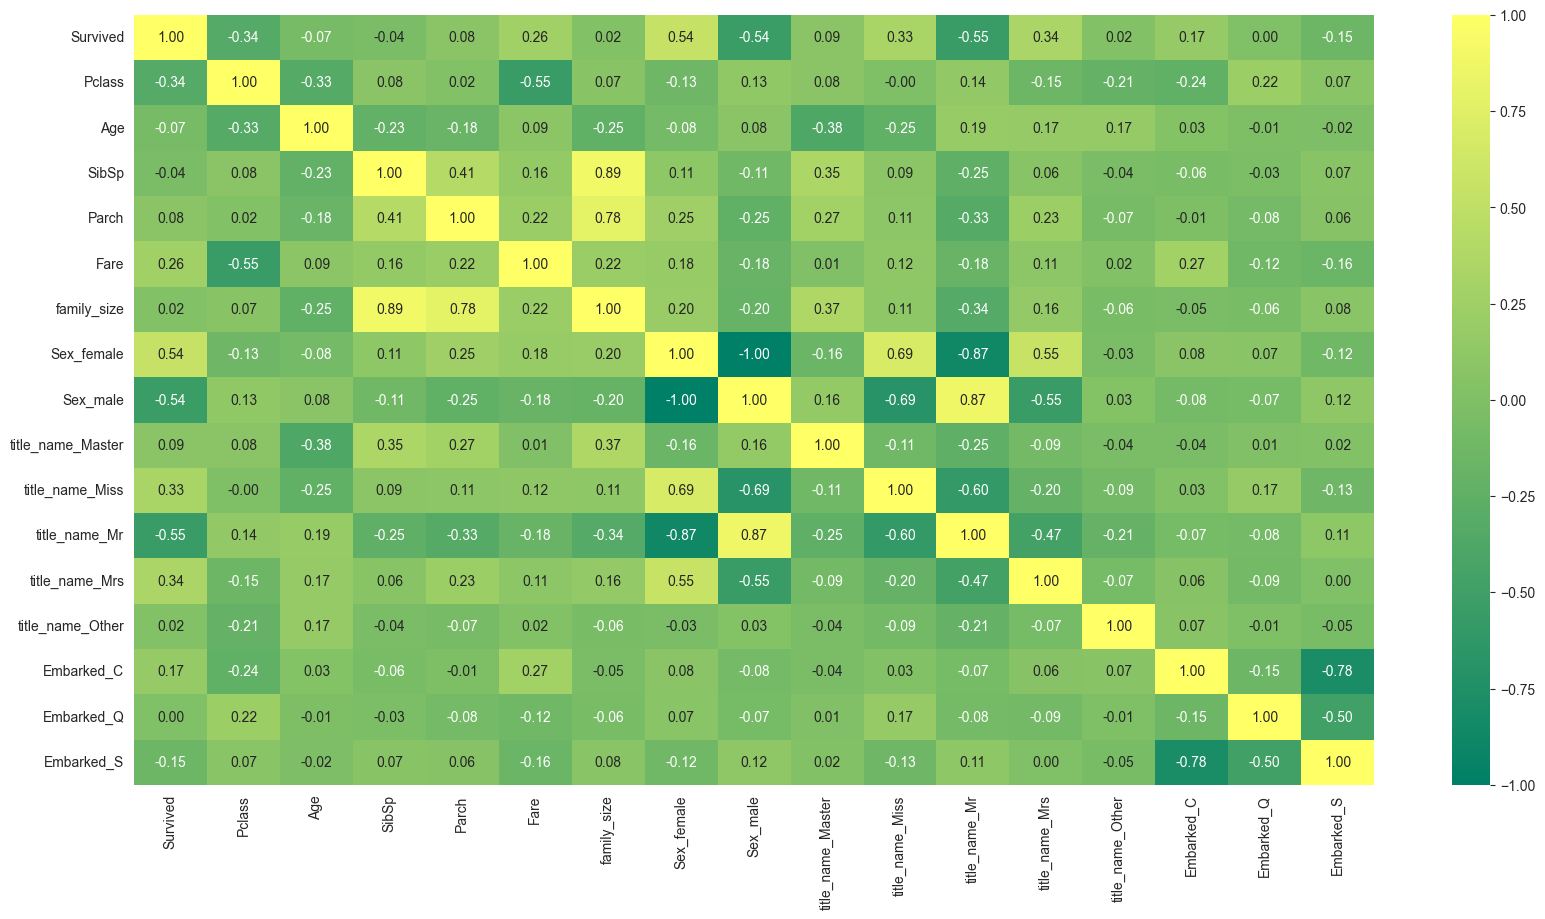

In [58]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

## Visualization of the Correlation Metrics

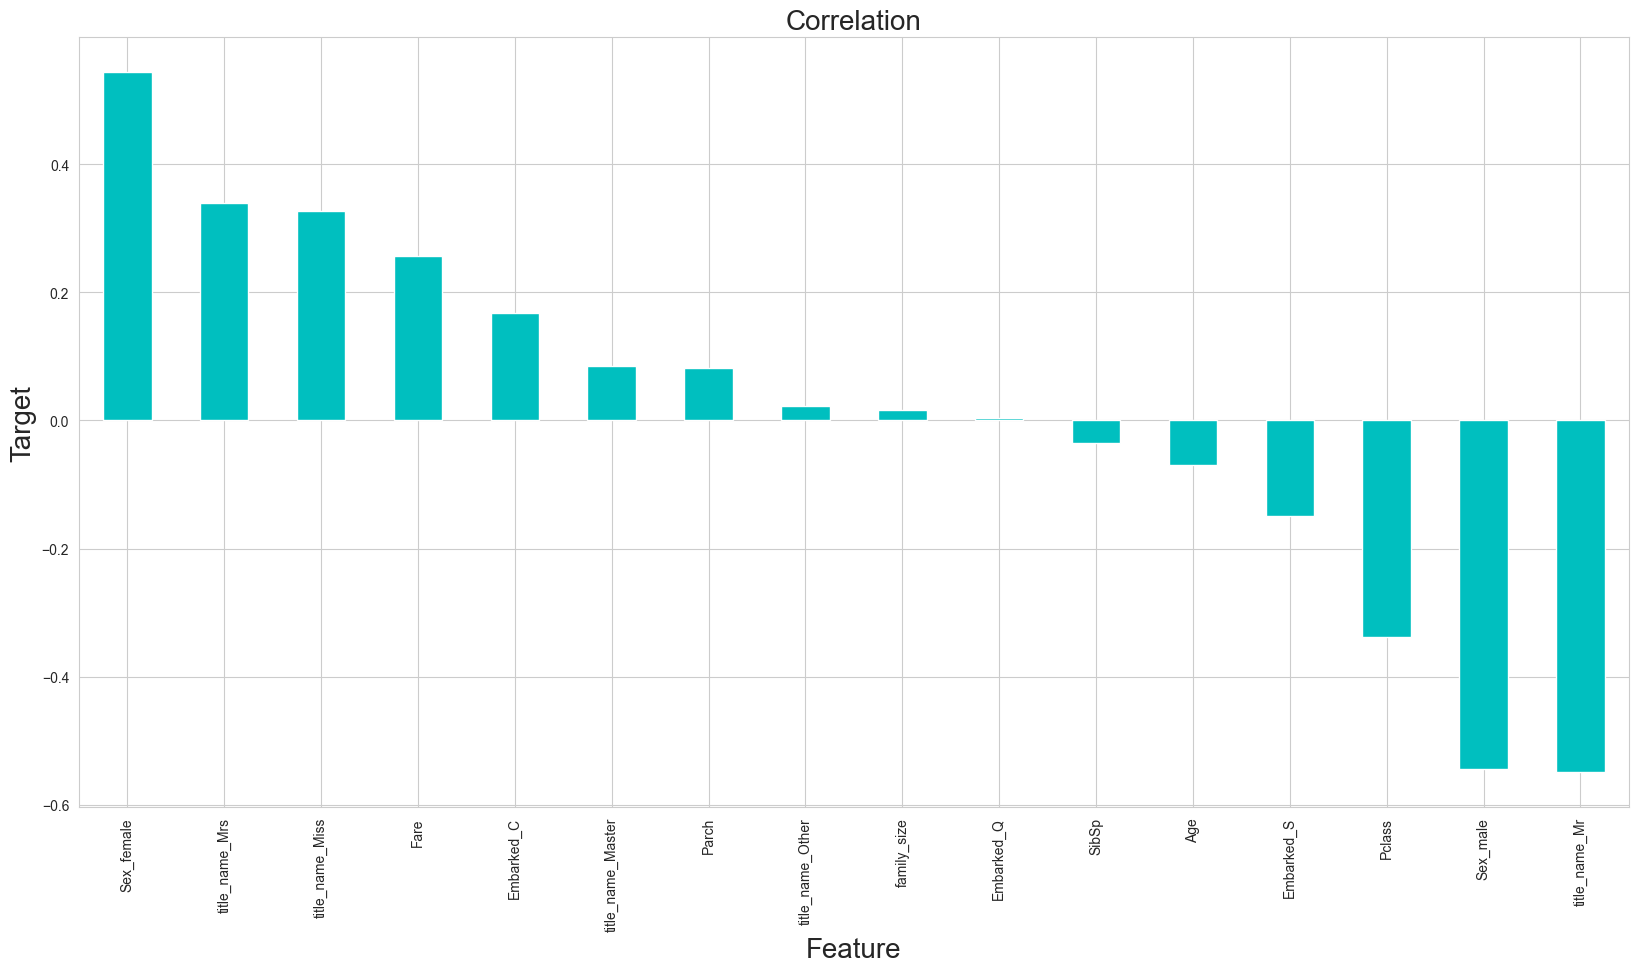

In [59]:
plt.figure(figsize = (20,10))

df_train.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('Target', fontsize = 20)

plt.title('Correlation', fontsize = 20)

plt.show()

--------------------------------------------------------
<a class="anchor"  id="5"></a>
# 5- Models Training and Evaluation ⚙️

In [60]:
# List of classifiers to evaluate
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter= 1500, n_jobs=-1)),
    ("KNN", KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("SVC", SVC(random_state=42, probability=True)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1))
]

<a class="anchor"  id="5.1"></a>
## 5.1- K-fold Cross-Validation Evaluation and Feature Selection

> Applying cross-validation through pipelines helps us thoroughly test machine learning models. It checks their performance across various data sets, ensuring a strong evaluation. By integrating feature selection within this process through pipelines, we carefully choose the best features. This method involves testing these features on different data parts, guaranteeing they work well across different situations. This meticulous approach ensures our selected features are reliable and effective, leading to a robust and widely applicable model.

In [61]:
# Initialize RFE feature selector
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1))


# Creating lists for classifier names, mean_test_accuracy_scores, and results.
results = []
mean_test_accuracy_scores = []
classifier_names = []

for model_name, model in classifiers:
    # Print model name
    print(f"For {model_name}:")
    
    # Steps Creation
    steps = list()
    
    steps.append(('feature_selector', RFE_selector))  # RFE feature selection
    
    steps.append((model_name, model))

    # Create the pipeline
    pipeline = Pipeline(steps=steps)
                        
    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation with train scores
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy',n_jobs=-1, return_train_score=True)
    
    print(f"Cross-validation completed successfully for {model_name}")
    print('*' * 50)

    # Append results to the list
    results.append({
        "Model Name": model_name,
        "Mean Train Accuracy": np.mean(cv_results['train_score']),
        "Mean Test Accuracy": np.mean(cv_results['test_score'])
    })
    
    mean_test_accuracy_scores.append(np.mean(cv_results['test_score']))
    classifier_names.append(model_name)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)

For Logistic Regression:
Cross-validation completed successfully for Logistic Regression
**************************************************
For KNN:
Cross-validation completed successfully for KNN
**************************************************
For Gaussian Naive Bayes:
Cross-validation completed successfully for Gaussian Naive Bayes
**************************************************
For SVC:
Cross-validation completed successfully for SVC
**************************************************
For Decision Tree:
Cross-validation completed successfully for Decision Tree
**************************************************
For Random Forest:
Cross-validation completed successfully for Random Forest
**************************************************
For AdaBoost:
Cross-validation completed successfully for AdaBoost
**************************************************
For Gradient Boosting:
Cross-validation completed successfully for Gradient Boosting
*******************************************

,Model Name,Mean Train Accuracy,Mean Test Accuracy
0,Logistic Regression,0.815350,0.809693
1,KNN,0.874319,0.825164
2,Gaussian Naive Bayes,0.802373,0.803325
3,SVC,0.835841,0.820643
4,Decision Tree,0.988161,0.804238
5,Random Forest,0.988161,0.826090
6,AdaBoost,0.844267,0.806949
7,Gradient Boosting,0.904599,0.841573
8,LightGBM,0.971086,0.837895
9,XGBoost,0.977460,0.827887


### Mean Test Accuracy Scores by Classifiers

In [62]:
# Creating a DataFrame from the data
data = pd.DataFrame({'Classifier': classifier_names, 'Test Accuracy': mean_test_accuracy_scores})

# Creating Plotly bar chart
fig = px.bar(data, x='Test Accuracy', y='Classifier', orientation='h', color='Test Accuracy',
             title='Mean Test Accuracy Scores by Classifiers', text='Test Accuracy', color_continuous_scale='viridis')

# Customizing the layout
fig.update_layout(
    xaxis_title='Test Accuracy',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False,
    height=500,
    width=900
)

fig.show()

> Among the various models evaluated during cross-validation, LightGBM Classifier emerged as the top performer. It exhibited exceptional performance with a Excellent Mean Train Accuracy score and Excellent Mean Test Accuracy score Notably, the model demonstrated no signs of overfitting, making it our chosen model for further analysis.

## Selected Features 

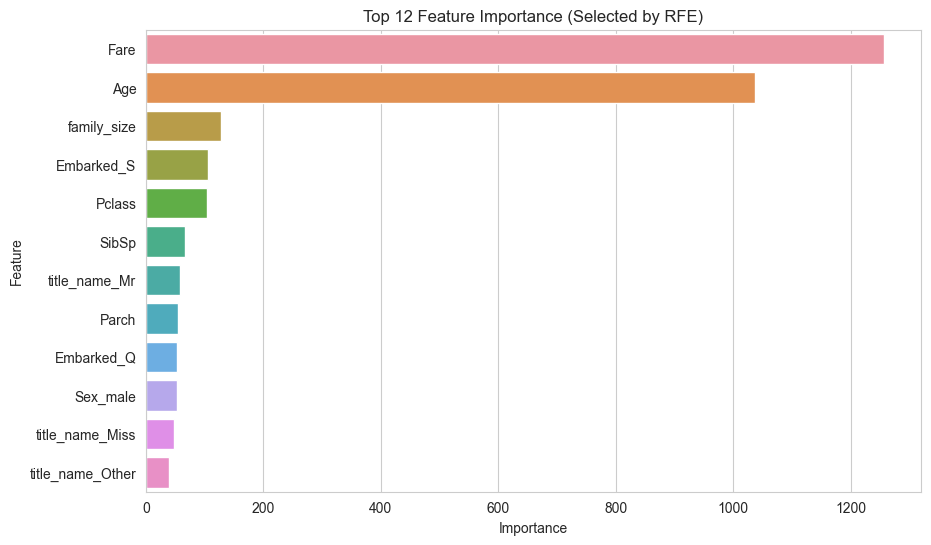

In [63]:
# Initialize RFE feature selector and fit it to the training data
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=12).fit(X_train, y_train)

# Get selected feature names and importance values
selected_feature_names = X_train.columns[RFE_selector.support_]
feature_importances = RFE_selector.estimator_.feature_importances_

# Create a DataFrame and sort features by importance
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot the top 12 selected feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:12])  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 12 Feature Importance (Selected by RFE)')
plt.show()

--------------------------------------------------------
<a class="anchor"  id="6"></a>
# 6- Hyperparameter Tuning  🛠️

> Hyperparameter tuning with GridSearch is crucial for optimizing model accuracy, preventing overfitting, and ensuring stable, robust predictions. It saves time, enhances computational efficiency, and leads to better-informed decisions, making it indispensable in machine learning model development.

### Hyperparameter Tuning for LightGBM Classifier

In [64]:
param_grid = {
    'LightGBM__learning_rate': [0.1, 0.2, 0.3],
    'LightGBM__n_estimators': [50, 100, 200],
    'LightGBM__num_leaves': [11 ,21 ,31],
}

In [65]:
steps=[]
steps.append(('feature_selector', RFE_selector))
steps.append(("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1)))
pipeline=Pipeline(steps=steps)

In [66]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_search.fit(X=X_train, y=y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'LightGBM__learning_rate': 0.2, 'LightGBM__n_estimators': 100, 'LightGBM__num_leaves': 11}
Best Score: 0.7788003320880034


In [67]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
mean_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]

print("Mean Train Score:", mean_train_score)
print("Mean Test Score:", mean_test_score)

Mean Train Score: 0.9612984313816954
Mean Test Score: 0.7788003320880034


In [68]:
final_model=grid_search.best_estimator_

In [69]:
final_model

Pipeline(steps=[('feature_selector',
                 RFE(estimator=LGBMClassifier(random_state=42, verbose=-1),
                     n_features_to_select=12)),
                ('LightGBM',
                 LGBMClassifier(learning_rate=0.2, num_leaves=11,
                                random_state=42, verbose=-1))])

<a class="anchor"  id="6.1"></a>
## 6.1- ROC Curve for Final Model (LightGBM Classifier)

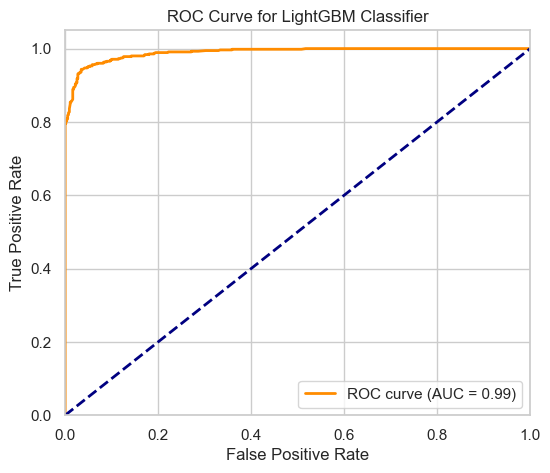

In [70]:
# Predict probabilities for the positive class using the final model
y_probabilities = final_model.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_train, y_probabilities)
auc = roc_auc_score(y_train, y_probabilities)

# Plotting the ROC curve
sns.set(style='whitegrid')
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM Classifier')
plt.legend(loc='lower right')
plt.show()

> An ROC curve with AUC = 0.99 means a excellent classifier. For the LightGBM  Classifier, it signifies the model correctly ranks 99% of the positive class higher than the negative class, based on the probability scores predicted by the model. 

<a class="anchor"  id="7"></a>
# 7- Submission💡

In [71]:
# Making predictions on the test dataset using the final trained model
predictions = final_model.predict(
    df_test.drop('PassengerId', axis=1)
)

In [72]:
output = pd.DataFrame(
    {
     'PassengerId': df_test.PassengerId,
     'Survived': predictions
    }
)

In [73]:
output.shape

(418, 2)

In [74]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
